<a href="https://colab.research.google.com/github/Uthantaiml/huggingface_hub/blob/main/Uthant_MCX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


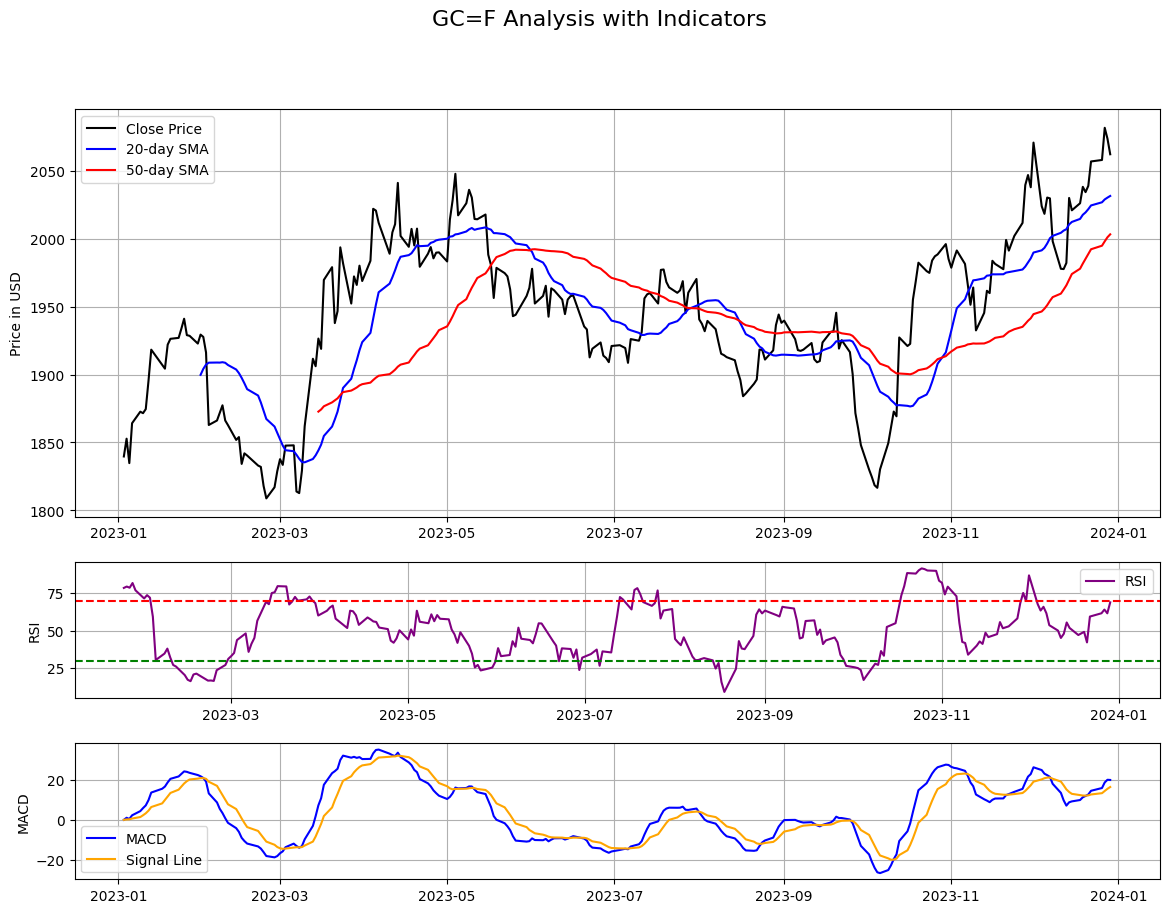

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import numpy as np

# Fetch historical data
symbol = 'GC=F'  # Gold Futures, adjust to your symbol if necessary
data = yf.download(symbol, start="2023-01-01", end="2024-01-01")
data['20_SMA'] = data['Close'].rolling(window=20).mean()
data['50_SMA'] = data['Close'].rolling(window=50).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
data['12_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['26_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12_EMA'] - data['26_EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1, 1]})
fig.suptitle(f"{symbol} Analysis with Indicators", fontsize=16)

# Plot candlestick with SMAs
ax1.plot(data.index, data['Close'], label='Close Price', color='black')
ax1.plot(data['20_SMA'], label='20-day SMA', color='blue')
ax1.plot(data['50_SMA'], label='50-day SMA', color='red')
ax1.set_ylabel('Price in USD')
ax1.legend()
ax1.grid()

# Plot RSI
ax2.plot(data.index, data['RSI'], label='RSI', color='purple')
ax2.axhline(70, linestyle='--', color='red')  # Overbought
ax2.axhline(30, linestyle='--', color='green')  # Oversold
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid()

# Plot MACD
ax3.plot(data.index, data['MACD'], label='MACD', color='blue')
ax3.plot(data.index, data['Signal_Line'], label='Signal Line', color='orange')
ax3.set_ylabel('MACD')
ax3.legend()
ax3.grid()

# Display the chart
plt.show()
